## 讀取資料

In [1]:
import pandas as pd

dataset = pd.read_csv('LoanStats.csv')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0,19,47,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423814 entries, 0 to 423813
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 468.8+ MB


In [3]:
dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [4]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## 計算遺失值比例

In [5]:
(dataset.isna().sum() / len(dataset)).sort_values(ascending=False)

total_cu_tl                            1.000000
sec_app_mort_acc                       1.000000
sec_app_revol_util                     1.000000
sec_app_open_act_il                    1.000000
sec_app_num_rev_accts                  1.000000
sec_app_chargeoff_within_12_mths       1.000000
sec_app_collections_12_mths_ex_med     1.000000
sec_app_mths_since_last_major_derog    1.000000
sec_app_inq_last_6mths                 1.000000
sec_app_earliest_cr_line               1.000000
revol_bal_joint                        1.000000
inq_last_12m                           1.000000
inq_fi                                 1.000000
all_util                               1.000000
max_bal_bc                             1.000000
open_rv_24m                            1.000000
open_rv_12m                            1.000000
il_util                                1.000000
total_bal_il                           1.000000
mths_since_rcnt_il                     1.000000
open_il_24m                            1

In [6]:
((dataset.isna().sum() / len(dataset)) > 0.3).head()

id                  True
member_id           True
loan_amnt          False
funded_amnt        False
funded_amnt_inv    False
dtype: bool

In [7]:
import numpy as np
s = (dataset.isna().sum() / len(dataset)) > 0.3

s.where(s > 0.3)

id                                            1.0
member_id                                     1.0
loan_amnt                                     NaN
funded_amnt                                   NaN
funded_amnt_inv                               NaN
term                                          NaN
int_rate                                      NaN
installment                                   NaN
grade                                         NaN
sub_grade                                     NaN
emp_title                                     NaN
emp_length                                    NaN
home_ownership                                NaN
annual_inc                                    NaN
verification_status                           NaN
issue_d                                       NaN
loan_status                                   NaN
pymnt_plan                                    NaN
url                                           1.0
desc                                          1.0


## 刪除遺失值比例過高的欄位

In [8]:
dataset = dataset.iloc[:,2:111]         
empty_cols = [i for i in range(45,72)]   
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)
#dataset.info()

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423814 entries, 0 to 423813
Data columns (total 82 columns):
loan_amnt                         423810 non-null float64
funded_amnt                       423810 non-null float64
funded_amnt_inv                   423810 non-null float64
term                              423810 non-null object
int_rate                          423810 non-null object
installment                       423810 non-null float64
grade                             423810 non-null object
sub_grade                         423810 non-null object
emp_title                         398837 non-null object
emp_length                        403904 non-null object
home_ownership                    423810 non-null object
annual_inc                        423810 non-null float64
verification_status               423810 non-null object
issue_d                           423810 non-null object
loan_status                       423810 non-null object
pymnt_plan                   

In [9]:
dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', nan, 'Late (16-30 days)', 'Default'],
      dtype=object)

## 目標編碼轉換

In [11]:
data_with_loanstatus_sliced = dataset[(dataset['loan_status']=="Fully Paid") | (dataset['loan_status']=="Charged Off")]

In [12]:
#data_with_loanstatus_sliced.info()

In [13]:
dataset['loan_status'].head()

0    Fully Paid
1    Fully Paid
2    Fully Paid
3    Fully Paid
4    Fully Paid
Name: loan_status, dtype: object

In [14]:
di = {"Fully Paid":0, "Charged Off":1}   
Dataset_withBoolTarget = data_with_loanstatus_sliced.replace({"loan_status": di})


In [15]:
Dataset_withBoolTarget['loan_status'].head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

## 探索遺失值

In [16]:
stats = Dataset_withBoolTarget.isnull().sum(axis = 1)

Populating the interactive namespace from numpy and matplotlib


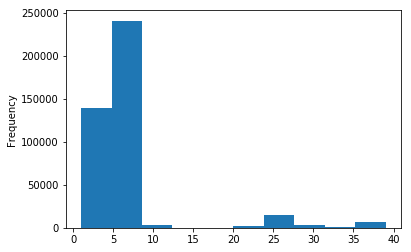

In [17]:
%pylab inline
stats.plot(kind = 'hist')

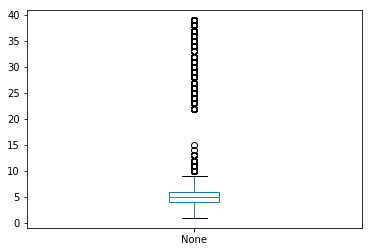

In [18]:
stats.plot(kind = 'box')

In [19]:
stats2 = Dataset_withBoolTarget.isnull().sum(axis = 0)

Populating the interactive namespace from numpy and matplotlib


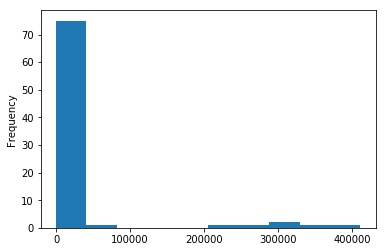

In [20]:
%pylab inline
stats2.plot(kind = 'hist')

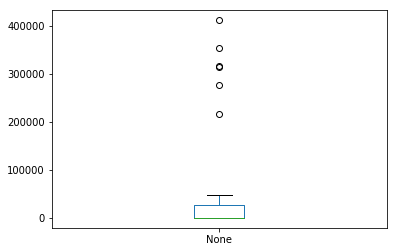

In [21]:
stats2.plot(kind = 'box')

In [22]:
Dataset_withBoolTarget.shape

(411273, 82)

## 刪除遺失值超過 340000 的欄位

In [23]:
dataset=Dataset_withBoolTarget.dropna(thresh = 340000,axis=1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (411273, 76)


In [24]:
stats2 = dataset.isnull().sum(axis = 0)

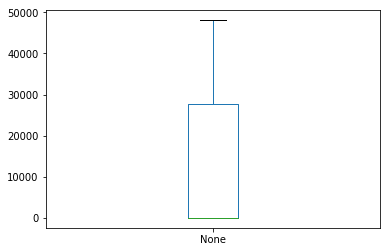

In [25]:
stats2.plot(kind = 'box')

## 移除遺失值過高的欄位

In [26]:
del_col_names = ["delinq_2yrs",  "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title", "term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line", "initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m", "num_accts_ever_120_pd", "delinq_amnt", 
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"] 
dataset = dataset.drop(labels = del_col_names, axis = 1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (411273, 54)


In [27]:
(dataset.isna().sum() / len(dataset)).sort_values(ascending= False).head()

mths_since_recent_inq    0.116837
mo_sin_old_il_acct       0.099136
pct_tl_nvr_dlq           0.067824
avg_cur_bal              0.067481
mo_sin_old_rev_tl_op     0.067454
dtype: float64

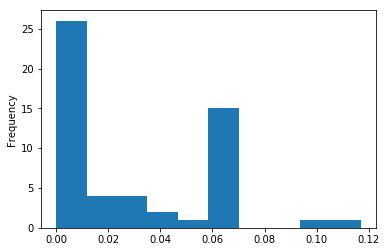

In [28]:
(dataset.isna().sum() / len(dataset)).plot(kind= 'hist')

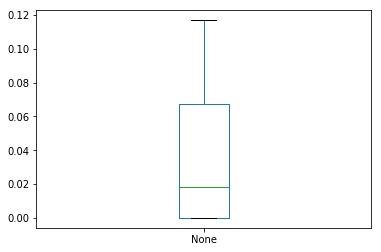

In [29]:
(dataset.isna().sum() / len(dataset)).plot(kind= 'box')

## 欄位篩選

In [30]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] 

In [31]:
Final_data = dataset[features]

In [32]:
Final_data.shape

(411273, 18)

In [33]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3 years,96500.0,MORTGAGE,A,2927.22,1.0,0.0,7.62%,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10+ years,55000.0,OWN,B,6074.19,4.0,0.0,10.99%,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10+ years,130000.0,MORTGAGE,B,398.28,3.0,0.0,11.99%,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0
3,28000.0,5 years,325000.0,MORTGAGE,A,23915.86,5.0,0.0,7.62%,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,0
4,12000.0,4 years,60000.0,RENT,B,3775.55,0.0,0.0,10.99%,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,0


In [34]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411273 entries, 0 to 423811
Data columns (total 18 columns):
funded_amnt              411273 non-null float64
emp_length               391832 non-null object
annual_inc               411273 non-null float64
home_ownership           411273 non-null object
grade                    411273 non-null object
last_pymnt_amnt          411273 non-null float64
mort_acc                 403778 non-null float64
pub_rec                  411273 non-null float64
int_rate                 411273 non-null object
open_acc                 411273 non-null float64
num_actv_rev_tl          383532 non-null float64
mo_sin_rcnt_rev_tl_op    383531 non-null float64
mo_sin_old_rev_tl_op     383531 non-null float64
bc_util                  399679 non-null float64
bc_open_to_buy           399920 non-null float64
avg_cur_bal              383520 non-null float64
acc_open_past_24mths     403778 non-null float64
loan_status              411273 non-null int64
dtypes: float

In [35]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership,grade,int_rate
0,3 years,MORTGAGE,A,7.62%
1,10+ years,OWN,B,10.99%
2,10+ years,MORTGAGE,B,11.99%
3,5 years,MORTGAGE,A,7.62%
4,4 years,RENT,B,10.99%


In [36]:
Final_data['int_rate'] = Final_data['int_rate'].map(lambda e: float(e.replace('%', '')) )

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (411273, 18)


In [38]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership,grade
0,3 years,MORTGAGE,A
1,10+ years,OWN,B
2,10+ years,MORTGAGE,B
3,5 years,MORTGAGE,A
4,4 years,RENT,B


In [39]:
Final_data['grade'].unique()

array(['A', 'B', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [40]:
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

In [41]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership
0,3 years,MORTGAGE
1,10+ years,OWN
2,10+ years,MORTGAGE
3,5 years,MORTGAGE
4,4 years,RENT


In [42]:
Final_data['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'NONE', 'OTHER', 'ANY'], dtype=object)

In [43]:
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})

In [44]:
Final_data.select_dtypes(include='object').head()

,emp_length
0,3 years
1,10+ years
2,10+ years
3,5 years
4,4 years


In [45]:
Final_data['emp_length'].unique()

array(['3 years', '10+ years', '5 years', '4 years', '6 years', '1 year',
       '2 years', '7 years', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

In [46]:
Final_data["emp_length"] = Final_data["emp_length"].fillna('0')

In [47]:
import re
Final_data["emp_length"] = Final_data["emp_length"].map(lambda e: int(re.search('(\d+)', e).group(0)) )

In [48]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411273 entries, 0 to 411272
Data columns (total 18 columns):
funded_amnt              411273 non-null float64
emp_length               411273 non-null int64
annual_inc               411273 non-null float64
home_ownership           411273 non-null int64
grade                    411273 non-null int64
last_pymnt_amnt          411273 non-null float64
mort_acc                 403778 non-null float64
pub_rec                  411273 non-null float64
int_rate                 411273 non-null float64
open_acc                 411273 non-null float64
num_actv_rev_tl          383532 non-null float64
mo_sin_rcnt_rev_tl_op    383531 non-null float64
mo_sin_old_rev_tl_op     383531 non-null float64
bc_util                  399679 non-null float64
bc_open_to_buy           399920 non-null float64
avg_cur_bal              383520 non-null float64
acc_open_past_24mths     403778 non-null float64
loan_status              411273 non-null int64
dtypes: float64

## 以平均數填補遺失值

In [49]:
s = Final_data.isna().sum() 
s[s>0]

mort_acc                  7495
num_actv_rev_tl          27741
mo_sin_rcnt_rev_tl_op    27742
mo_sin_old_rev_tl_op     27742
bc_util                  11594
bc_open_to_buy           11353
avg_cur_bal              27753
acc_open_past_24mths      7495
dtype: int64

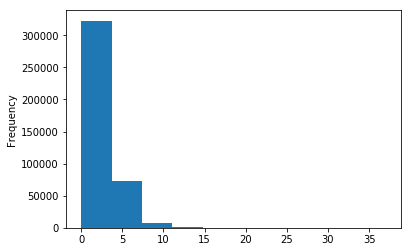

In [50]:
Final_data['mort_acc'].plot(kind = 'hist')

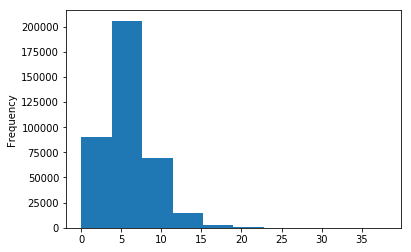

In [51]:
Final_data['num_actv_rev_tl'].plot(kind = 'hist')

In [52]:
Final_data.fillna(Final_data.mean(),inplace = True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (411273, 18)


In [53]:
s = Final_data.isna().sum() 
s

funded_amnt              0
emp_length               0
annual_inc               0
home_ownership           0
grade                    0
last_pymnt_amnt          0
mort_acc                 0
pub_rec                  0
int_rate                 0
open_acc                 0
num_actv_rev_tl          0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
bc_util                  0
bc_open_to_buy           0
avg_cur_bal              0
acc_open_past_24mths     0
loan_status              0
dtype: int64

In [54]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3,96500.0,6,7,2927.22,1.0,0.0,7.62,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10,55000.0,4,6,6074.19,4.0,0.0,10.99,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10,130000.0,6,6,398.28,3.0,0.0,11.99,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0
3,28000.0,5,325000.0,6,7,23915.86,5.0,0.0,7.62,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,0
4,12000.0,4,60000.0,5,6,3775.55,0.0,0.0,10.99,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,0


## 資料標準化

In [54]:
from sklearn import preprocessing,metrics 
scl = preprocessing.StandardScaler() 


In [55]:
Final_data.columns

Index(['funded_amnt', 'emp_length', 'annual_inc', 'home_ownership', 'grade',
       'last_pymnt_amnt', 'mort_acc', 'pub_rec', 'int_rate', 'open_acc',
       'num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op',
       'bc_util', 'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths',
       'loan_status'],
      dtype='object')

In [56]:
fields = Final_data.columns.values[:-1]
fields

array(['funded_amnt', 'emp_length', 'annual_inc', 'home_ownership',
       'grade', 'last_pymnt_amnt', 'mort_acc', 'pub_rec', 'int_rate',
       'open_acc', 'num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_old_rev_tl_op', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths'], dtype=object)

In [57]:
data_clean = pd.DataFrame(scl.fit_transform(Final_data[fields]), columns = fields)
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
0,-0.299476,-0.787331,0.429087,0.890293,1.387048,-0.252133,-0.383997,-0.323443,-1.439964,1.134412,-0.248869,-0.220361,-0.730107,0.694300,-0.452627,-0.110954,-0.075437
1,1.520061,1.130234,-0.344829,-2.171730,0.620423,0.263337,1.006702,-0.323443,-0.672232,0.532558,-0.589591,0.167135,1.637470,-0.444565,0.617771,-0.252862,-0.437197
2,-0.299476,1.130234,1.053815,0.890293,0.620423,-0.666370,0.543136,-0.323443,-0.444419,-0.470533,-0.248869,-0.607858,0.123587,1.059815,-0.366732,1.465171,-0.075437
3,1.634916,-0.239455,4.690290,0.890293,1.387048,3.185782,1.470269,-0.323443,-1.439964,0.733176,-0.248869,-0.543275,0.533360,0.063307,0.421572,2.551702,0.648083
4,-0.299476,-0.513393,-0.251586,-0.640718,0.620423,-0.113177,-0.847563,-0.323443,-0.672232,0.733176,0.432574,-0.801606,-1.526888,-1.906622,0.521884,-0.836013,1.371604


In [58]:
data_clean['loan_status'] = Final_data['loan_status']


In [59]:
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,-0.299476,-0.787331,0.429087,0.890293,1.387048,-0.252133,-0.383997,-0.323443,-1.439964,1.134412,-0.248869,-0.220361,-0.730107,0.694300,-0.452627,-0.110954,-0.075437,0
1,1.520061,1.130234,-0.344829,-2.171730,0.620423,0.263337,1.006702,-0.323443,-0.672232,0.532558,-0.589591,0.167135,1.637470,-0.444565,0.617771,-0.252862,-0.437197,0
2,-0.299476,1.130234,1.053815,0.890293,0.620423,-0.666370,0.543136,-0.323443,-0.444419,-0.470533,-0.248869,-0.607858,0.123587,1.059815,-0.366732,1.465171,-0.075437,0
3,1.634916,-0.239455,4.690290,0.890293,1.387048,3.185782,1.470269,-0.323443,-1.439964,0.733176,-0.248869,-0.543275,0.533360,0.063307,0.421572,2.551702,0.648083,0
4,-0.299476,-0.513393,-0.251586,-0.640718,0.620423,-0.113177,-0.847563,-0.323443,-0.672232,0.733176,0.432574,-0.801606,-1.526888,-1.906622,0.521884,-0.836013,1.371604,0


## Bootstrap Sampling

In [60]:
data_clean['loan_status'].value_counts()

0    340444
1     70829
Name: loan_status, dtype: int64

In [61]:
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]


In [62]:
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)

In [63]:
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])

In [64]:
data_clean.shape

(11000, 18)

In [65]:
data_clean.index

Int64Index([102049,  54185, 248748,  55839, 221120, 313288, 391202, 351317,
            342719, 161718,
            ...
             69716, 169403,  83358, 140877, 369186, 255975,  29222,  73375,
             43831,  55285],
           dtype='int64', length=11000)

## Reshuffle

In [66]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [67]:
data_clean.index

RangeIndex(start=0, stop=11000, step=1)

In [68]:
print("Current shape of dataset :",data_clean.shape)
data_clean.head()


Current shape of dataset : (11000, 18)


,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,0.643540,1.130234,-0.531315,-2.171730,-0.146201,1.360570,-0.847563,-0.323443,0.008930,0.331940,1.454738,-0.866189,1.284610,0.005595,0.238799,-0.757717,-0.437197,0
1,-0.976514,-0.513393,-0.899215,0.890293,0.620423,-0.696290,0.079569,3.459498,-0.216606,-0.671151,-0.248869,-0.091196,-1.117115,-0.717739,0.132232,-0.003032,0.648083,1
2,0.637495,0.856296,-0.400775,-0.640718,-0.912826,-0.649035,-0.847563,-0.323443,0.979415,4.344303,0.773295,-0.478692,-0.206508,1.336836,-0.638832,-0.345394,0.286323,1
3,0.099492,1.130234,1.799759,0.890293,-0.146201,-0.114499,1.470269,-0.323443,0.239021,-0.470533,-0.930313,-0.478692,0.840690,-1.379512,0.865156,4.070434,0.286323,0
4,-0.220892,1.130234,-0.180722,0.890293,0.620423,0.971895,0.543136,-0.323443,-0.330512,-0.470533,0.091852,-0.543275,-0.217891,0.636588,-0.497633,1.915968,0.286323,0


In [69]:
data_clean['loan_status'].value_counts()

1    5500
0    5500
Name: loan_status, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8800, 17), (2200, 17), (8800,), (2200,))

## RFE (特徵篩選)

In [72]:
from sklearn import linear_model,svm
from sklearn.feature_selection import RFE

clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)

LogisticRegression(C=1e+30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
rfe = RFE(clf_LR, 10)
rfe = rfe.fit(data_clean.iloc[:,:-1].values,
              data_clean.iloc[:,-1].values)

In [74]:
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True False  True  True False False False
  True False  True False  True]
[1 4 1 1 1 1 3 1 1 7 6 8 1 5 1 2 1]


## RFECV  (特徵篩選)

In [75]:
from sklearn.feature_selection import RFECV
rfe2 = RFECV(clf_LR)
rfe2 = rfe2.fit(data_clean.iloc[:,:-1].values,
              data_clean.iloc[:,-1].values)

In [76]:
rfe2.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
       False, False, False,  True, False,  True, False,  True])

In [77]:
rfe2.ranking_

array([1, 5, 1, 1, 1, 1, 4, 2, 1, 8, 7, 9, 1, 6, 1, 3, 1])

## PCA (特徵萃取)

In [78]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))


Expected Variance is [0.16232556 0.15513639 0.12465342 0.07489166 0.07221797 0.06732684
 0.05748614 0.05068757 0.04473473 0.03877179]


<BarContainer object of 10 artists>

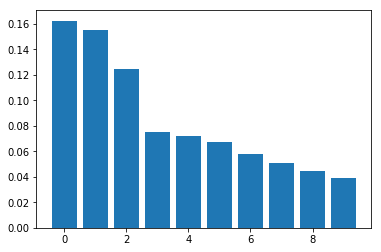

In [79]:
plt.bar(x= range(10), height=pca.explained_variance_ratio_)

## 資料篩選

In [80]:
X_train.columns[rfe.support_]

Index(['funded_amnt', 'annual_inc', 'home_ownership', 'grade',
       'last_pymnt_amnt', 'pub_rec', 'int_rate', 'mo_sin_old_rev_tl_op',
       'bc_open_to_buy', 'acc_open_past_24mths'],
      dtype='object')

In [81]:
X_train[X_train.columns[rfe.support_]].head()

,funded_amnt,annual_inc,home_ownership,grade,last_pymnt_amnt,pub_rec,int_rate,mo_sin_old_rev_tl_op,bc_open_to_buy,acc_open_past_24mths
10735,-1.145773,-0.717801,0.890293,-0.146201,-0.407042,5.350968,0.535178,-0.957759,-0.585435,0.286323
5937,0.305021,-0.399616,-0.640718,0.620423,1.508346,1.568027,-0.638060,-0.957759,-0.184798,-0.798958
7642,-0.834457,-0.954060,0.890293,-0.146201,-0.689413,-0.323443,-0.066249,1.478114,-0.127357,-0.437197
3328,-1.581011,-0.904287,-2.171730,-0.146201,-0.676590,-0.323443,0.423550,-0.536603,-0.499769,-1.160718
8681,0.063222,-0.585023,-0.640718,-0.912826,-0.671479,-0.323443,0.535178,-1.060202,-0.448660,0.648083


In [82]:
X_train = X_train[X_train.columns[rfe.support_]]

In [83]:
X_test = X_test[X_test.columns[rfe.support_]]

In [84]:
X_train.shape, X_test.shape

((8800, 10), (2200, 10))

In [85]:
data_clean = data_clean[['funded_amnt', 'annual_inc', 'grade', 'last_pymnt_amnt', 'mort_acc',
       'int_rate', 'mo_sin_old_rev_tl_op', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'loan_status']]

In [86]:
data_clean.shape

(11000, 11)

## Grid Search

In [87]:
from sklearn.model_selection import GridSearchCV

def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean.iloc[:,:-1].values
    y=data_clean.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    return mean_scores,grid.best_score_,grid.best_estimator_


In [88]:
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)



Best accuracy is 0.8189090909090909
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [89]:
mean_scores

[0.7684545454545455,
 0.7978181818181819,
 0.8103636363636364,
 0.8164545454545454,
 0.8185454545454546,
 0.8189090909090909,
 0.8187272727272727]

In [90]:
Best_classifier

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
Best_classifier.C

100

In [92]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
from sklearn.metrics import accuracy_score
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
LR_Accuracy

0.8277272727272728

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, LR_Predict.round())

array([[ 816,  290],
       [  89, 1005]])

In [95]:
LR_Predict

array([9.11042333e-01, 1.43155628e-11, 3.64561725e-03, ...,
       8.62737229e-01, 6.65865327e-01, 9.14943950e-01])

In [96]:
LR_Predict.round()

array([1., 0., 0., ..., 1., 1., 1.])

## ROC Curve

In [97]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")


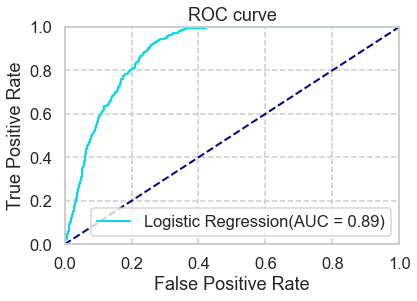

In [98]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()



## Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', random_state=0)
rf

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [100]:
maxFeatures = range(1,data_clean.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
maxFeatures

range(1, 10)

In [101]:
from sklearn.grid_search import RandomizedSearchCV
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values
rand.fit(X,y)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=9, n_jobs=1,
          param_distributions={'max_features': range(1, 10)},
          pre_dispatch='2*n_jobs', random_state=10, refit=True,
          scoring='accuracy', verbose=0)

In [102]:
mean_scores = [result.mean_validation_score for result in rand.grid_scores_]
print(rand.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [103]:
from sklearn.metrics import accuracy_score
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [104]:
rfPredict = randomForest.predict(X_test)
rfAccuracy = accuracy_score(y_test,rfPredict)
print(rfAccuracy)


0.8177272727272727


In [105]:
rfPredictproba = randomForest.predict_proba(X_test)[:,1] 
roc_score = metrics.roc_auc_score(y_test,rfPredict)

In [106]:
roc_score

0.8177739172405128

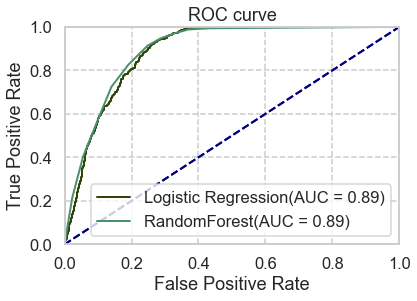

In [107]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,rfPredictproba,'RandomForest')
plt.show()



In [108]:
randomForest.feature_importances_

array([0.06989559, 0.07286856, 0.01646866, 0.02244153, 0.51813062,
       0.0081888 , 0.10397864, 0.07222208, 0.07575509, 0.04005044])

In [109]:
# len(randomForest.feature_importances_)

Text(0,0.5,'Normalized Gini Importance')

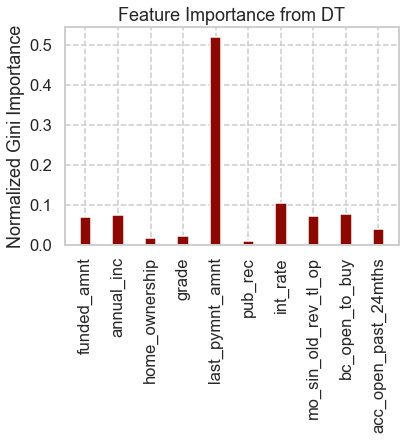

In [110]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(10), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')


## Adaboost

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [112]:

Ada_clf = AdaBoostClassifier(n_estimators=50)
scores = cross_val_score(Ada_clf, data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
scores


array([0.82224646, 0.83278778, 0.83060556])

In [113]:
scores.mean()

0.8285466000262168

In [114]:
data_clean.shape

(11000, 11)

In [115]:
Ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [116]:
Ada_clf.predict(X_test)

array([1, 0, 0, ..., 1, 1, 1])

In [117]:
ada_Predict = Ada_clf.predict_proba(X_test)[:,1]

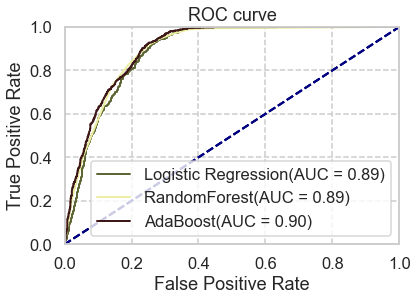

In [118]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,rfPredictproba,'RandomForest')
plotAUC(y_test, ada_Predict, 'AdaBoost')
plt.show()